In [149]:
import math
import pandas as pd
import pandas_datareader as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense , LSTM
from keras.models import Sequential
import matplotlib.pyplot as plt
from datetime import date
plt.style.use('fivethirtyeight')

In [156]:
stock_code = input(">>> ").upper()
df = web.DataReader(stock_code,data_source='yahoo',start='',end=date.today())
df

>>> AAPL


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-12-29,29.277500,29.100000,29.112499,29.182501,60158000.0,27.468960
2016-12-30,29.299999,28.857500,29.162500,28.955000,122345200.0,27.254812
2017-01-03,29.082500,28.690001,28.950001,29.037500,115127600.0,27.332476
2017-01-04,29.127501,28.937500,28.962500,29.004999,84472400.0,27.301880
2017-01-05,29.215000,28.952499,28.980000,29.152500,88774400.0,27.440716
...,...,...,...,...,...,...
2021-12-21,173.199997,169.119995,171.559998,172.990005,91185900.0,172.990005
2021-12-22,175.860001,172.149994,173.039993,175.639999,92135300.0,175.639999
2021-12-23,176.850006,175.270004,175.850006,176.279999,68227500.0,176.279999


<function matplotlib.pyplot.show(close=None, block=None)>

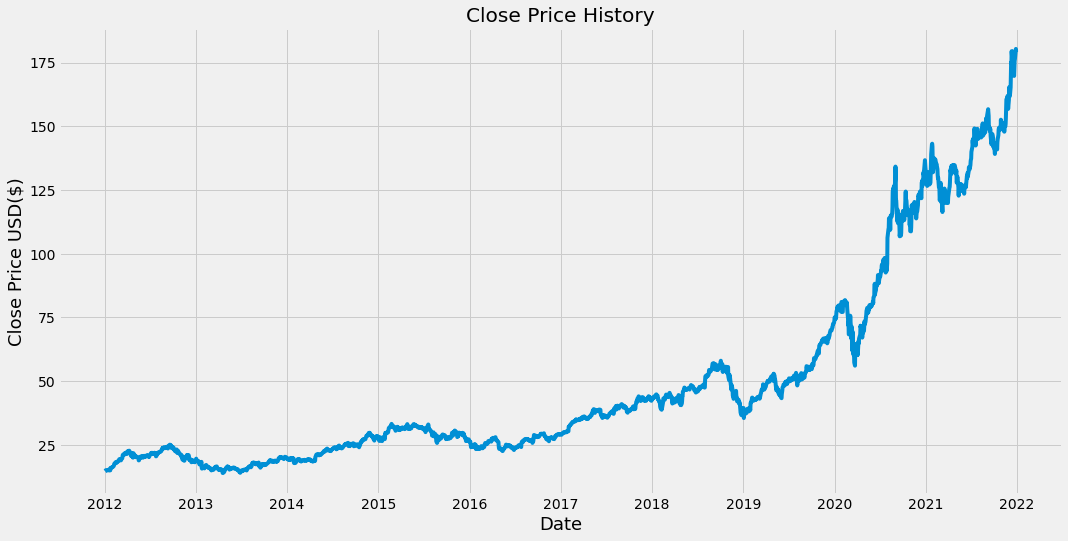

In [89]:
plt.figure(figsize=(16,8))
plt.title("Close Price History")
plt.plot(df['Close'])
plt.ylabel("Close Price USD($)", fontsize=18)
plt.xlabel("Date",fontsize=18)
plt.show

In [90]:
data = df.filter(['Close'])# filter the data and shows only the Close column
dataset = data.values

In [91]:
training_len = math.ceil(len(dataset)* .8)# getting 80% data for training 

In [92]:
scaler = MinMaxScaler(feature_range=(0,1))# scale the stock price between 0,1
scaler_data = scaler.fit_transform(dataset)# train the data
train_data = scaler_data[0:training_len,:1]# train 80% of data


In [93]:
x_train = []
y_train = []

In [94]:
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])#0-59
    y_train.append(train_data[i,0])#60-

In [95]:
x_train = np.array(x_train)# convert to numpy array
y_train = np.array(y_train)# convert to numpy array

In [96]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [97]:
model = Sequential()# build Nural Network Regressor
model.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [98]:
# compile Regression Neural Network
model.compile(optimizer='adam',loss='mean_squared_error')

In [99]:
# train the model
model.fit(x_train, y_train ,batch_size=8,epochs=1)

244/244 [==============================] - 8s 23ms/step - loss: 5.0067e-04


In [100]:
# create the test data-set
test_data = scaler_data[training_len-60:,:]

In [101]:
x_test = []
y_test = []
y_test = dataset[training_len:,:]

In [102]:
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [103]:
# convert the data to numpy array
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [104]:
# ready for prediction
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [105]:
# root mean squared value
rmse = np.sqrt(np.mean(predictions - y_test)**2)
train = data[:training_len]
valid = data[training_len:]
valid['Predictions'] = predictions

C:\Users\amals\AppData\Local\Temp/ipykernel_9352/848674198.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


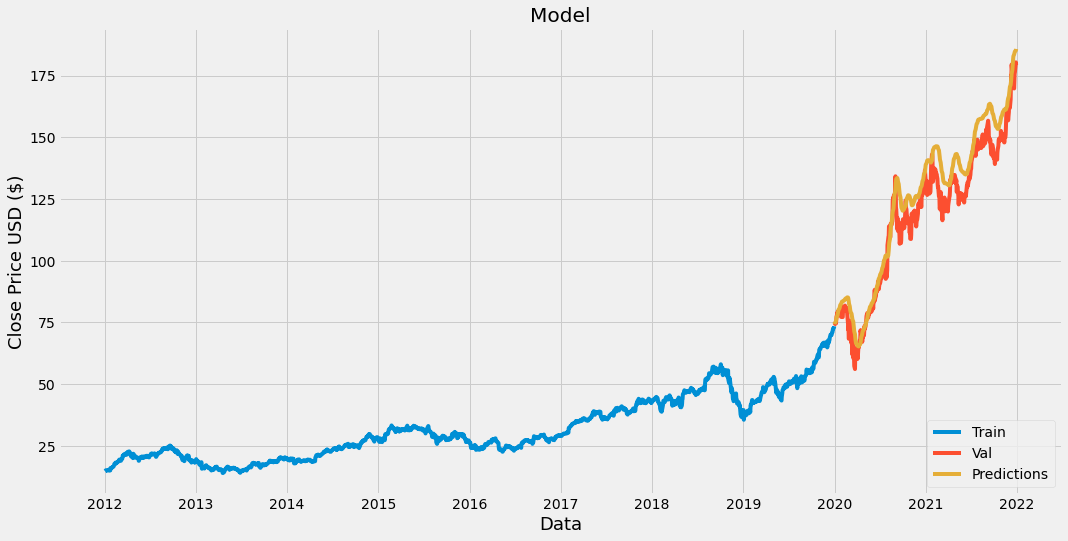

In [106]:
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Data",fontsize=18)
plt.ylabel("Close Price USD ($)",fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()


In [111]:
new_df = web.DataReader('AAPL',data_source='yahoo',start='',end=date.today())
new_df1 = new_df.filter(['Close'])
last_60 = new_df1[-60:].values
last_60_scaled = scaler.transform(last_60)

In [117]:
X_test = []
X_test.append(last_60_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))


In [125]:
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print("$",pred_price[0][0])

$ 186.42004
